<a href="https://colab.research.google.com/github/URK21CO3006/codecave/blob/code-cave/EDA_on_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  EDA ON TERRORISM

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import hamming_loss, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Terrorism.csv", encoding = "ISO-8859-1")


<ipython-input-4-b61249d2f726>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Terrorism.csv", encoding = "ISO-8859-1")


In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'Country_Code','country_txt':'Country_Name','region':'Region_Code','region_txt':'Region_Name','city':'City','attacktype1':'AttackType_Code','attacktype1_txt':'AttackType_Name','targtype1':'Targtype_Code','targtype1_txt':'Targtype_Name','gname':'Group_Name','weaptype1':'Weaptype1_Code','weaptype1_txt':'Weaptype1_Name','nkill':'Killed','nwound':'Wounded','success':'Success','crit3':'Crit'},inplace=True)
df=df[['Year','Month','Day','Country_Code','Country_Name','Region_Code','Region_Name','City','AttackType_Code','AttackType_Name','Targtype_Code','Targtype_Name','Group_Name','Weaptype1_Code','Weaptype1_Name','Killed','Wounded','Success','Crit']]

In [ ]:
df.head(20)

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,City,AttackType_Code,AttackType_Name,Targtype_Code,Targtype_Name,Group_Name,Weaptype1_Code,Weaptype1_Name,Killed,Wounded,Success,Crit
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0,1,1
1,1970,0,0,130,Mexico,1,North America,Mexico city,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0,1,1
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0,1,1
3,1970,1,0,78,Greece,8,Western Europe,Athens,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives,NaN,NaN,1,1
4,1970,1,0,101,Japan,4,East Asia,Fukouka,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,NaN,NaN,1,1
5,1970,1,1,217,United States,1,North America,Cairo,2,Armed Assault,3,Police,Black Nationalists,5,Firearms,0.0,0.0,1,1
6,1970,1,2,218,Uruguay,3,South America,Montevideo,1,Assassination,3,Police,Tupamaros (Uruguay),5,Firearms,0.0,0.0,0,1
7,1970,1,2,217,United States,1,North America,Oakland,3,Bombing/Explosion,21,Utilities,Unknown,6,Explosives,0.0,0.0,1,1
8,1970,1,2,217,United States,1,North America,Madison,7,Facility/Infrastructure Attack,4,Military,New Year's Gang,8,Incendiary,0.0,0.0,1,1
9,1970,1,3,217,United States,1,North America,Madison,7,Facility/Infrastructure Attack,2,Government (General),New Year's Gang,8,Incendiary,0.0,0.0,1,1


Data Cleaning

In [ ]:
df.describe()

,Year,Month,Day,Country_Code,Region_Code,AttackType_Code,Targtype_Code,Weaptype1_Code,Killed,Wounded,Success,Crit
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,131.968501,7.160938,3.247547,8.439719,6.447325,2.403272,3.167668,0.889598,0.875668
std,13.259430,3.388303,8.814045,112.414535,2.933408,1.915772,6.653838,2.173435,11.545741,35.949392,0.313391,0.329961
min,1970.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,78.000000,5.000000,2.000000,3.000000,5.000000,0.000000,0.000000,1.000000,1.000000
50%,2009.000000,6.000000,15.000000,98.000000,6.000000,3.000000,4.000000,6.000000,0.000000,0.000000,1.000000,1.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,3.000000,14.000000,6.000000,2.000000,2.000000,1.000000,1.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,9.000000,22.000000,13.000000,1570.000000,8191.000000,1.000000,1.000000


In [ ]:
df.drop_duplicates()


,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,City,AttackType_Code,AttackType_Name,Targtype_Code,Targtype_Name,Group_Name,Weaptype1_Code,Weaptype1_Name,Killed,Wounded,Success,Crit
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0,1,1
1,1970,0,0,130,Mexico,1,North America,Mexico city,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0,1,1
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0,1,1
3,1970,1,0,78,Greece,8,Western Europe,Athens,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives,NaN,NaN,1,1
4,1970,1,0,101,Japan,4,East Asia,Fukouka,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Somalia,11,Sub-Saharan Africa,Ceelka Geelow,2,Armed Assault,4,Military,Al-Shabaab,5,Firearms,1.0,2.0,1,0
181687,2017,12,31,200,Syria,10,Middle East & North Africa,Jableh,3,Bombing/Explosion,4,Military,Muslim extremists,6,Explosives,2.0,7.0,1,0
181688,2017,12,31,160,Philippines,5,Southeast Asia,Kubentog,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),8,Incendiary,0.0,0.0,1,1
181689,2017,12,31,92,India,6,South Asia,Imphal,3,Bombing/Explosion,2,Government (General),Unknown,6,Explosives,0.0,0.0,0,1


In [ ]:
df.dropna()

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,City,AttackType_Code,AttackType_Name,Targtype_Code,Targtype_Name,Group_Name,Weaptype1_Code,Weaptype1_Name,Killed,Wounded,Success,Crit
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0,1,1
1,1970,0,0,130,Mexico,1,North America,Mexico city,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0,1,1
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0,1,1
5,1970,1,1,217,United States,1,North America,Cairo,2,Armed Assault,3,Police,Black Nationalists,5,Firearms,0.0,0.0,1,1
6,1970,1,2,218,Uruguay,3,South America,Montevideo,1,Assassination,3,Police,Tupamaros (Uruguay),5,Firearms,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Somalia,11,Sub-Saharan Africa,Ceelka Geelow,2,Armed Assault,4,Military,Al-Shabaab,5,Firearms,1.0,2.0,1,0
181687,2017,12,31,200,Syria,10,Middle East & North Africa,Jableh,3,Bombing/Explosion,4,Military,Muslim extremists,6,Explosives,2.0,7.0,1,0
181688,2017,12,31,160,Philippines,5,Southeast Asia,Kubentog,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),8,Incendiary,0.0,0.0,1,1
181689,2017,12,31,92,India,6,South Asia,Imphal,3,Bombing/Explosion,2,Government (General),Unknown,6,Explosives,0.0,0.0,0,1


In [ ]:
df.isnull()

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,City,AttackType_Code,AttackType_Name,Targtype_Code,Targtype_Name,Group_Name,Weaptype1_Code,Weaptype1_Name,Killed,Wounded,Success,Crit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country_Code           0
Country_Name           0
Region_Code            0
Region_Name            0
City                 434
AttackType_Code        0
AttackType_Name        0
Targtype_Code          0
Targtype_Name          0
Group_Name             0
Weaptype1_Code         0
Weaptype1_Name         0
Killed             10313
Wounded            16311
Success                0
Crit                   0
dtype: int64

Summary statistics of  Year of Attacks,Countries Attacked,Type of Attack,Weapon,Target (with the help of codes given from the Dataset)

In [ ]:
df['AttackType_Name']= df['AttackType_Name'].replace({'Assassination':1,'Hostage Taking (Kidnapping)':0,'Armed Assault':4,'Bombing/Explosion':2,'Facility/Infrastructure Attack':3,'Hijacking':5,'Unknown':6,'Unarmed Assault':7,'Hostage Taking (Barricade Incident)':8,})
df['AttackType_Name']


0         1
1         0
2         1
3         2
4         3
         ..
181686    4
181687    2
181688    3
181689    2
181690    2
Name: AttackType_Name, Length: 181691, dtype: int64

In [ ]:
X=df.iloc[:, 8:11].values
print(X[0:10])

[[ 1  1 14]
 [ 6  0  7]
 [ 1  1 10]
 [ 3  2  7]
 [ 7  3  7]
 [ 2  4  3]
 [ 1  1  3]
 [ 3  2 21]
 [ 7  3  4]
 [ 7  3  2]]


In [ ]:
Y = df.iloc[:,9:11].values
print(Y[0:10])

[[ 1 14]
 [ 0  7]
 [ 1 10]
 [ 2  7]
 [ 3  7]
 [ 4  3]
 [ 1  3]
 [ 2 21]
 [ 3  4]
 [ 3  2]]


In [ ]:
print('Mean',df['Killed'].mean())
print('Median',df['Killed'].median())
print('Mode',df['Killed'].mode())




Mean 2.4032722986614385
Median 0.0
Mode 0    0.0
Name: Killed, dtype: float64


In [ ]:
print('Mean',df['Wounded'].mean())
print('Median',df['Wounded'].median())
print('Mode',df['Wounded'].mode())

Mean 3.1676684000483735
Median 0.0
Mode 0    0.0
Name: Wounded, dtype: float64


In [ ]:
Q1=df['Killed'].quantile(.25)
Q3=df['Killed'].quantile(.75)
print('IQR',Q3-Q1)

IQR 2.0


In [ ]:
Q1=df['Wounded'].quantile(.25)
Q3=df['Wounded'].quantile(.75)
print('IQR',Q3-Q1)

IQR 2.0


 Note: Country code gives the country name in turn gives how much terrorism has been distributed across the world.

In [ ]:
import scipy.stats as stats
Zscore=stats.zscore(df['Country_Code'])
print('Zscore is : ',Zscore)

Zscore is :  0        -0.657999
1        -0.017511
2         0.249359
3        -0.480086
4        -0.275486
            ...   
181686    0.445064
181687    0.605186
181688    0.249359
181689   -0.355547
181690    0.249359
Name: Country_Code, Length: 181691, dtype: float64


In [ ]:
df['Country_Code'].interpolate(method='linear',limit_direction='forward')

0          58
1         130
2         160
3          78
4         101
         ... 
181686    182
181687    200
181688    160
181689     92
181690    160
Name: Country_Code, Length: 181691, dtype: int64

Visualizations made from the model


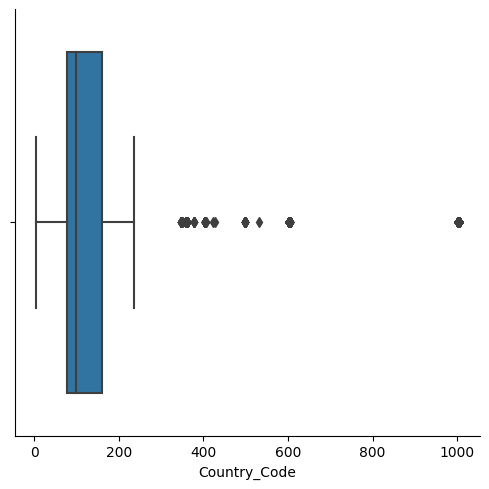

In [ ]:
import seaborn as sns
sns.catplot(x='Country_Code',kind='box',data=df)

IQR 160.0


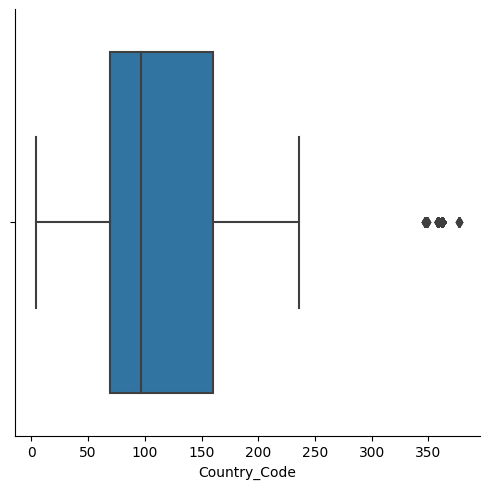

In [ ]:
Ql=df['Country_Code'].quantile(.25)
Q3=df['Country_Code'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['Country_Code']>lb) & (df['Country_Code']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='Country_Code',kind='box',data=dfout)

Text(0, 0.5, 'Year')

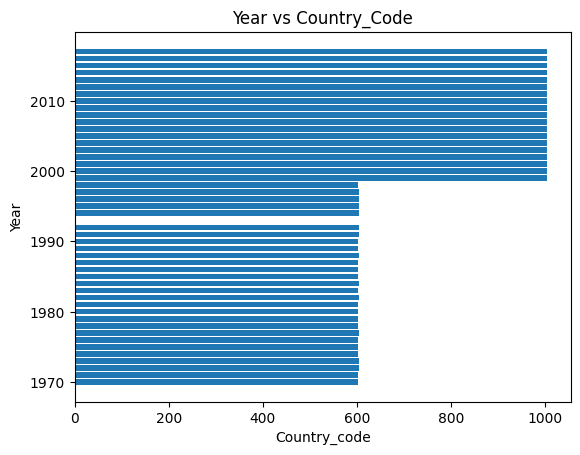

In [ ]:
plt.barh(df['Year'],df['Country_Code'] )
plt.title("Year vs Country_Code")
plt.xlabel("Country_code")
plt.ylabel("Year")

<BarContainer object of 12 artists>

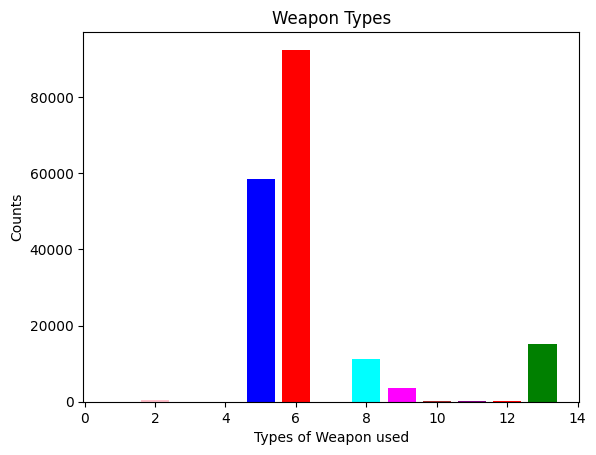

In [ ]:
data=df['Weaptype1_Code'].value_counts()
plt.title("Weapon Types")
plt.xlabel('Types of Weapon used')
plt.ylabel('Counts')
plt.bar(data.index,data.values,color=['red','blue','green','cyan','magenta','pink','purple','brown'])

([<matplotlib.patches.Wedge at 0x7ac62febff10>,
 [Text(0.9409006886662851, 0.5698297061994142, 'Business'),
  Text(6.735557395310444e-17, 1.1, 'Military'),
  Text(-0.8899186877588753, 0.6465637858537405, 'Police'),
  Text(-1.0845956443271418, -0.18344560040129673, 'Private Citizens & Property'),
  Text(-0.7360436695459461, -0.8174593057280211, 'Government (General)'),
  Text(-0.13786655385541488, -1.0913261718331657, 'Educational Institution'),
  Text(0.36175330768411146, -1.0388140085595712, 'Utilities'),
  Text(0.7011663855493696, -0.8475645696792858, 'Government (Diplomatic)'),
  Text(0.916213363261283, -0.6087307064552013, 'Airports & Aircraft'),
  Text(1.0140494638871334, -0.42626715190150144, 'Religious Figures/Institutions'),
  Text(1.0530514450279262, -0.31793498411561527, 'Journalists & Media'),
  Text(1.0759623596473313, -0.22870286535622414, 'Unknown'),
  Text(1.0913261710264157, -0.1378665602414978, 'Transportation'),
  Text(1.097829401166014, -0.06906957315252113, 'Violent

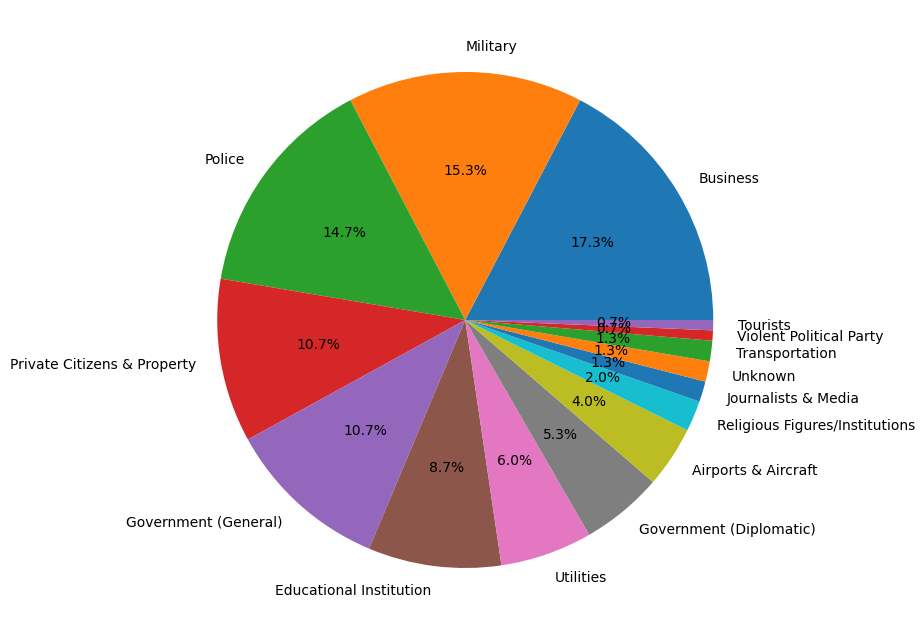

In [ ]:
data=df['Targtype_Name'].head(150).value_counts()
data
plt.figure(figsize=(8, 15))
plt.pie(data.values,labels=data.index,autopct='%1.1f%%')

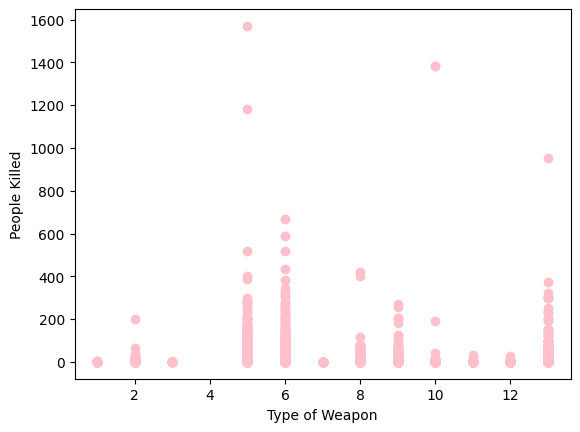

In [ ]:
x=df['Weaptype1_Code']
plt.xlabel('Type of Weapon')
plt.ylabel('People Killed')
y=df['Killed']
plt.scatter(x,y,c='pink')

Note 2: This Dataset being highly raw ,unorganized and imbalanced it creates a great deviations in our Analysis.There is a lot of class imbalance.Thus we have implemented the given set of data using Kmeans-clustering and KNN of multilabel classification.

K-Means of Clustering

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

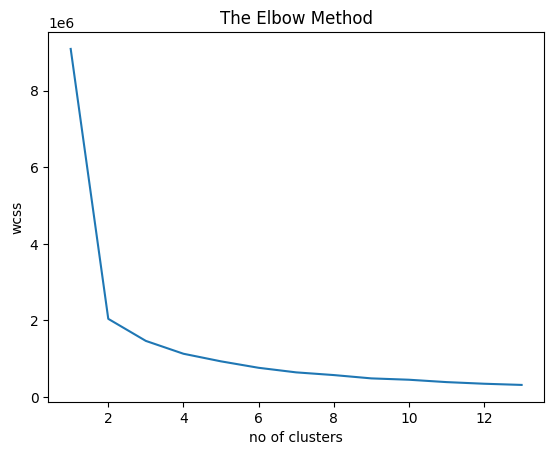

In [ ]:
plt.plot(range(1,14), wcss[:13])
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0,n_init=10)
y_kmeans= kmeansmodel.fit_predict(X)

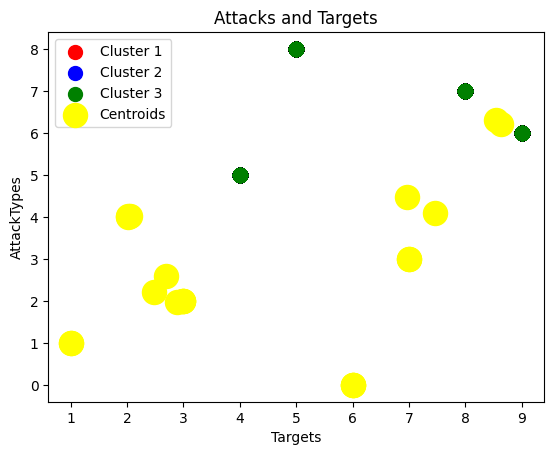

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Attacks and Targets')
plt.xlabel('Targets')
plt.ylabel('AttackTypes')
plt.legend()
plt.show()


KNN-Mulitlabel classification

In [ ]:
x=df.iloc[:,17:-1].values
y=df.iloc[:,17:].values



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25,random_state=42)

In [ ]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred =knn.predict(x_test)
print(y_pred)
print(y_test)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
hamming_loss_value = hamming_loss(y_test, y_pred)
subset_accuracy = accuracy_score(y_test, y_pred)

print("Hamming Loss:", hamming_loss_value)
print("Subset Accuracy:", subset_accuracy)

Hamming Loss: 0.06215646992346022
Subset Accuracy: 0.8756870601530796


In [ ]:
report=classification_report(y_test,y_pred)
print("Classification_report: " )
print(report)

Classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    121303
           1       0.88      1.00      0.93    119329

   micro avg       0.93      1.00      0.97    240632
   macro avg       0.94      1.00      0.97    240632
weighted avg       0.94      1.00      0.97    240632
 samples avg       0.93      0.99      0.95    240632



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
time_points = np.arange(0, 100)
data_size = len(time_points)
np.random.seed(42)
y_pred = np.random.randint(2, size=(data_size,2))
y_test = np.random.randint(2, size=(data_size, 2))
hamming_losses = []
subset_accuracies = []

In [ ]:
for t in range(data_size):
    hamming_loss_value = hamming_loss(y_test[t], y_pred[t])
    subset_accuracy = accuracy_score(y_test[t], y_pred[t])

    hamming_losses.append(hamming_loss_value)
    subset_accuracies.append(subset_accuracy)

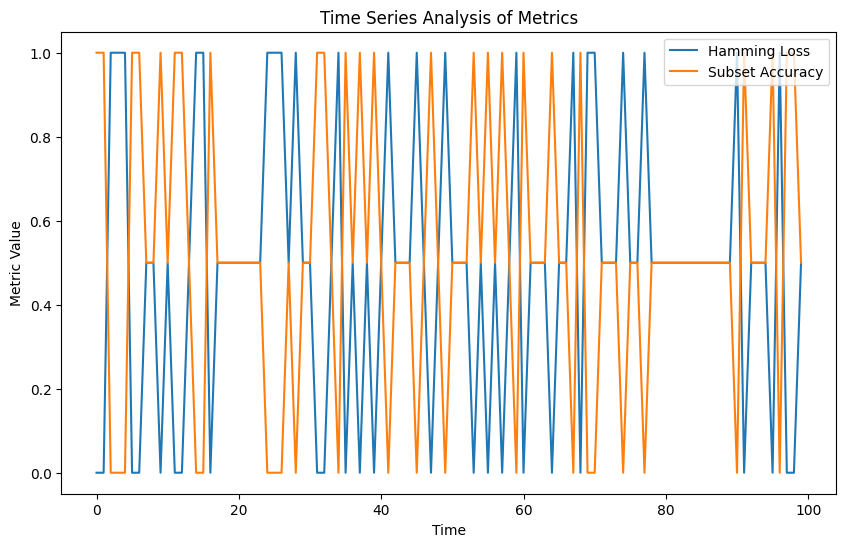

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, hamming_losses, label='Hamming Loss')
plt.plot(time_points, subset_accuracies, label='Subset Accuracy')
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.title('Time Series Analysis of Metrics')
plt.legend()
plt.show()